In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("brands.csv")

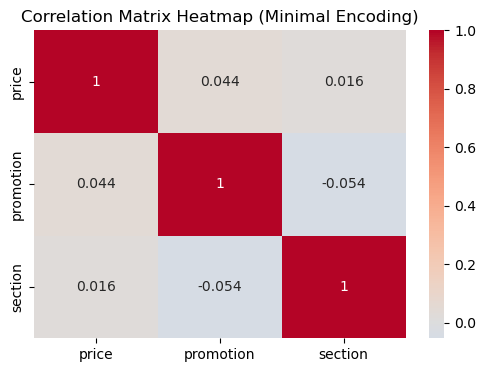

In [6]:
#Correlation Matrix
data_cleaned = data.drop(["size", "category", "basic_color", "product_id", "name", "brand", "url", "description"], axis=1)
data_cleaned["promotion"] = data_cleaned["promotion"].map({'Yes': 1, 'No': 0})

data_minimal = data_cleaned[["price", "promotion", "section"]]

le = LabelEncoder()
data_minimal["section"] = le.fit_transform(data_minimal["section"])

correlation_matrix_minimal = data_minimal.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_minimal, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap (Minimal Encoding)")
plt.show()

In [7]:
# Applying feature scaling to numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_minimal["price_scaled"] = scaler.fit_transform(data_minimal[["price"]])

In [8]:
# Train-test split process
from sklearn.model_selection import train_test_split

features = data_minimal[["promotion", "section", "price_scaled"]]
target = data_minimal["price"]  

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
# Linear Regression model and evaluation.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

evaluation_metrics = {
    "Model": ["Linear Regression"],
    "R² Score": [r2_score(y_test, y_pred_linear)],
    "MAE": [mean_absolute_error(y_test, y_pred_linear)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_linear))]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Model,R² Score,MAE,RMSE
0,Linear Regression,1.0,2.224677e-14,3.468464e-14


In [10]:
# Decision Trees model.
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

evaluation_metrics = {
    "Model": ["Decision Tree"],
    "R² Score": [r2_score(y_test, y_pred_tree)],
    "MAE": [mean_absolute_error(y_test, y_pred_tree)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_tree))]
}

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df

,Model,R² Score,MAE,RMSE
0,Decision Tree,0.999906,0.0034,0.305521


In [11]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

ensemble_evaluation_metrics = {
    "Model": ["Random Forest"],
    "R² Score": [r2_score(y_test, y_pred_rf)],
    "MAE": [mean_absolute_error(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_rf))]
}

ensemble_evaluation_df = pd.DataFrame(ensemble_evaluation_metrics)
ensemble_evaluation_df

,Model,R² Score,MAE,RMSE
0,Random Forest,0.999806,0.004439,0.439554


In [12]:
# Gradient Boosting

gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

ensemble_evaluation_metrics = {
    "Model": ["Gradient Boosting"],
    "R² Score": [r2_score(y_test, y_pred_gb)],
    "MAE": [mean_absolute_error(y_test, y_pred_gb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_gb))]
}

ensemble_evaluation_df_gradient_Boosting = pd.DataFrame(ensemble_evaluation_metrics)
ensemble_evaluation_df_gradient_Boosting

,Model,R² Score,MAE,RMSE
0,Gradient Boosting,0.999867,0.094741,0.364705


In [13]:
# Hyperparameter Tuning (GrisSearch) for RandomForest
from sklearn.model_selection import GridSearchCV

param_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf_model, param_rf, scoring='r2', cv=3, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


best_params_rf, best_score_rf

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50},
 0.9976105612252254)

In [14]:
# Hyperparameter Tuning (GrisSearch) for GradientBoosting.
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, scoring='r2', cv=3, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
best_params_gb, best_score_gb

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200},
 0.9978833629220324)

In [18]:
#csv file with best model

y_pred_gb_test = grid_search_gb.best_estimator_.predict(X_test)

results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_gb_test
})

results_df.to_csv("gradient_boosting_predictions.csv", index=False)

In [16]:
results_df

,Actual Price,Predicted Price
40362,42.355932,42.355764
89697,50.830508,50.830338
20974,19.500000,19.457917
62165,25.406780,25.407003
72921,33.067797,32.996655
...,...,...
50264,22.016949,22.017005
41257,25.406780,25.407211
35984,84.728814,84.729527
62800,50.830508,50.830338
